<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [1]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-03-18 21:28:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.4MB/s    in 2.5s    

2025-03-18 21:28:38 (60.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [3]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [7]:
valores_unicos = df['Age'].unique()
print(valores_unicos)

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


In [5]:
language_unique= df['LanguageAdmired'].unique()
print(language_unique)

[nan
 'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript'
 'C#' ... 'Elixir;Lua;Python;Ruby;SQL'
 'Bash/Shell (all shells);C;C++;HTML/CSS;Java;JavaScript;PowerShell;Rust;Solidity;SQL;TypeScript;VBA;Visual Basic (.Net)'
 'Bash/Shell (all shells);C#;HTML/CSS;Java;JavaScript;Objective-C;Python;SQL;Swift;TypeScript']


In [8]:
employment_types= df['Employment'].unique()
print(employment_types)


['Employed, full-time' 'Student, full-time'
 'Student, full-time;Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time' 'Employed, part-time'
 'Student, full-time;Employed, part-time'
 'Student, part-time;Employed, part-time' 'I prefer not to say'
 'Not employed, but looking for work' 'Student, part-time'
 'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time'
 'Student, full-time;Not employed, but looking for work;Independent contr

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



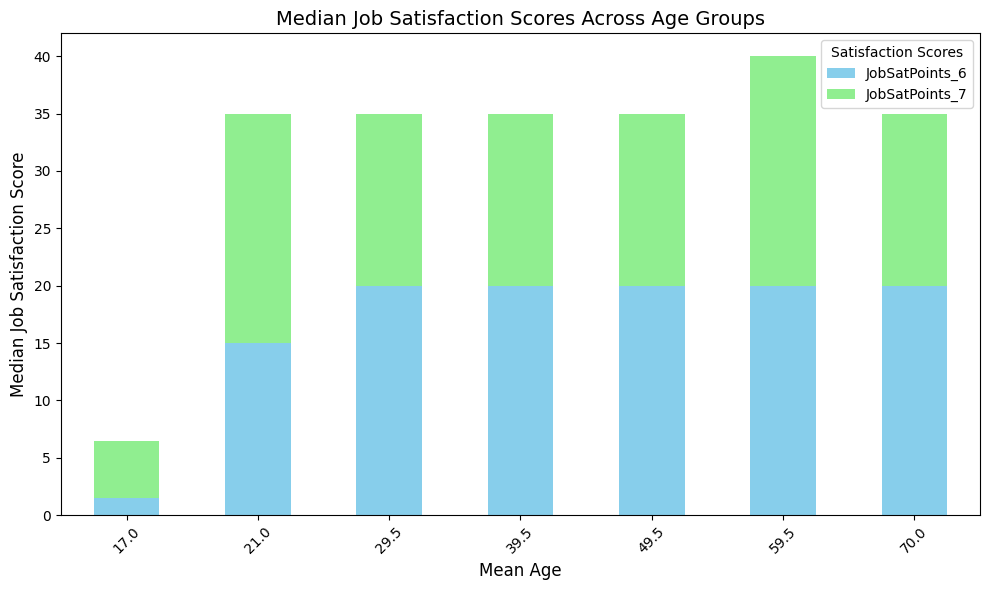

In [9]:
if 'Age' in df.columns and 'JobSatPoints_6' in df.columns and 'JobSatPoints_7' in df.columns:
   
    def extract_mean_age(age_range):
        parts = age_range.split('-')
        if len(parts) == 2:
            return (int(parts[0]) + int(parts[1].split()[0])) / 2  
        elif 'Under' in age_range:
            return 17
        elif '65' in age_range: 
            return 70  
        else:
            return None  
    
    df['MeanAge'] = df['Age'].apply(extract_mean_age)

    df = df.dropna(subset=['MeanAge'])

    median_satisfaction = df.groupby('MeanAge')[['JobSatPoints_6', 'JobSatPoints_7']].median()

    median_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen'])

    plt.title('Median Job Satisfaction Scores Across Age Groups', fontsize=14)
    plt.xlabel('Mean Age', fontsize=12)
    plt.ylabel('Median Job Satisfaction Score', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Satisfaction Scores", labels=['JobSatPoints_6', 'JobSatPoints_7'])
    plt.tight_layout()  

    plt.show()

else:
    print("Columns not found.")


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


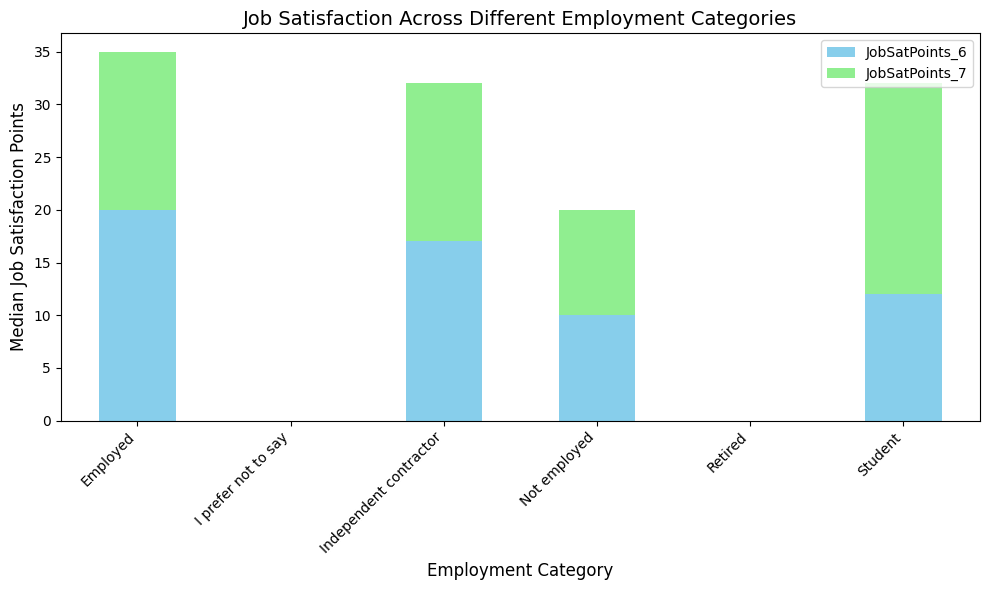

In [10]:
##Write your code here

df['EmploymentCategory'] = df['Employment'].str.split(',').str[0]

unique_employment_categories = df['EmploymentCategory'].unique()

satisfaction_by_employment = df.groupby('EmploymentCategory')[['JobSatPoints_6', 'JobSatPoints_7']].median()

satisfaction_by_employment.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen'])

plt.title('Job Satisfaction Across Different Employment Categories', fontsize=14)
plt.xlabel('Employment Category', fontsize=12)
plt.ylabel('Median Job Satisfaction Points', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


/tmp/ipykernel_410/153968026.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered_df.groupby(["SalaryRange", "SatisfactionGroup"]).size().unstack()


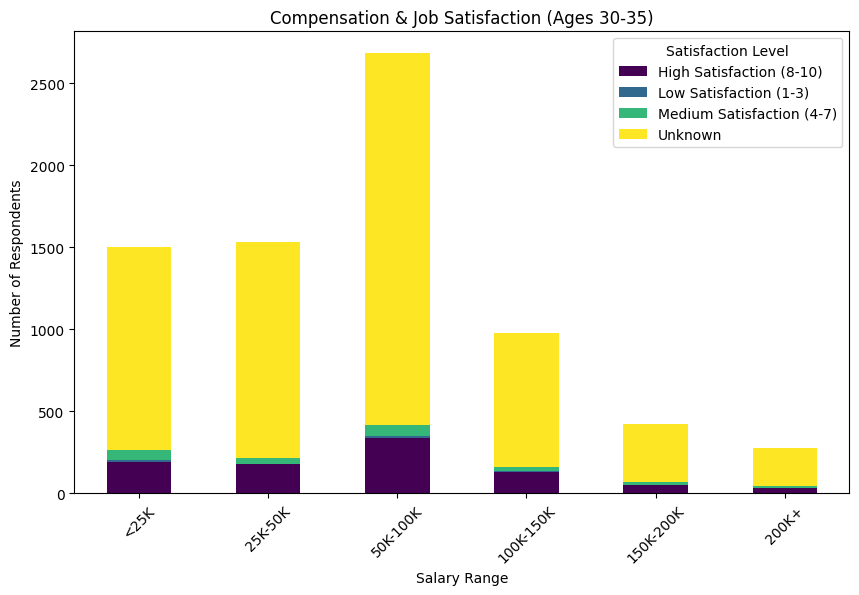

In [11]:
filtered_df = df[df["Age"] == "25-34 years old"]

filtered_df = filtered_df.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6"])

bins = [0, 25000, 50000, 100000, 150000, 200000, 500000]
labels = ["<25K", "25K-50K", "50K-100K", "100K-150K", "150K-200K", "200K+"]

filtered_df["SalaryRange"] = pd.cut(filtered_df["ConvertedCompYearly"], bins=bins, labels=labels, right=False)

def categorize_satisfaction(x):
    if x in [1, 2, 3]:
        return "Low Satisfaction (1-3)"
    elif x in [4, 5, 6, 7]:
        return "Medium Satisfaction (4-7)"
    elif x in [8, 9, 10]:
        return "High Satisfaction (8-10)"
    return "Unknown"

filtered_df["SatisfactionGroup"] = filtered_df["JobSatPoints_6"].apply(categorize_satisfaction)

grouped = filtered_df.groupby(["SalaryRange", "SatisfactionGroup"]).size().unstack()

grouped.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

plt.title("Compensation & Job Satisfaction (Ages 30-35)")
plt.xlabel("Salary Range")
plt.ylabel("Number of Respondents")
plt.legend(title="Satisfaction Level")
plt.xticks(rotation=45)

plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


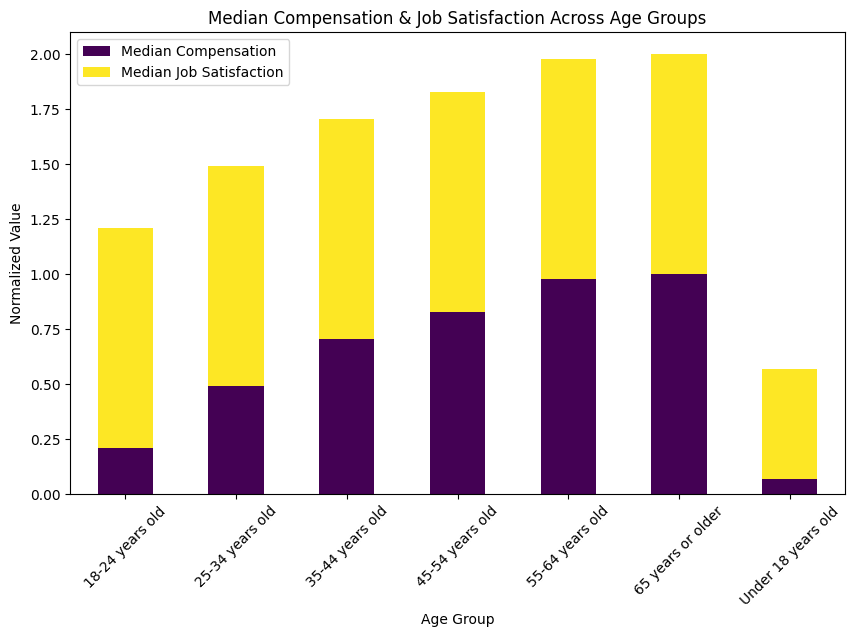

In [12]:
df = df.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6"])

median_values = df.groupby("Age")[["ConvertedCompYearly", "JobSatPoints_6"]].median()

median_values["NormalizedComp"] = median_values["ConvertedCompYearly"] / median_values["ConvertedCompYearly"].max()
median_values["NormalizedSat"] = median_values["JobSatPoints_6"] / median_values["JobSatPoints_6"].max()

stacked_data = median_values[["NormalizedComp", "NormalizedSat"]]

stacked_data.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

plt.title("Median Compensation & Job Satisfaction Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Normalized Value")
plt.legend(["Median Compensation", "Median Job Satisfaction"])
plt.xticks(rotation=45)

plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


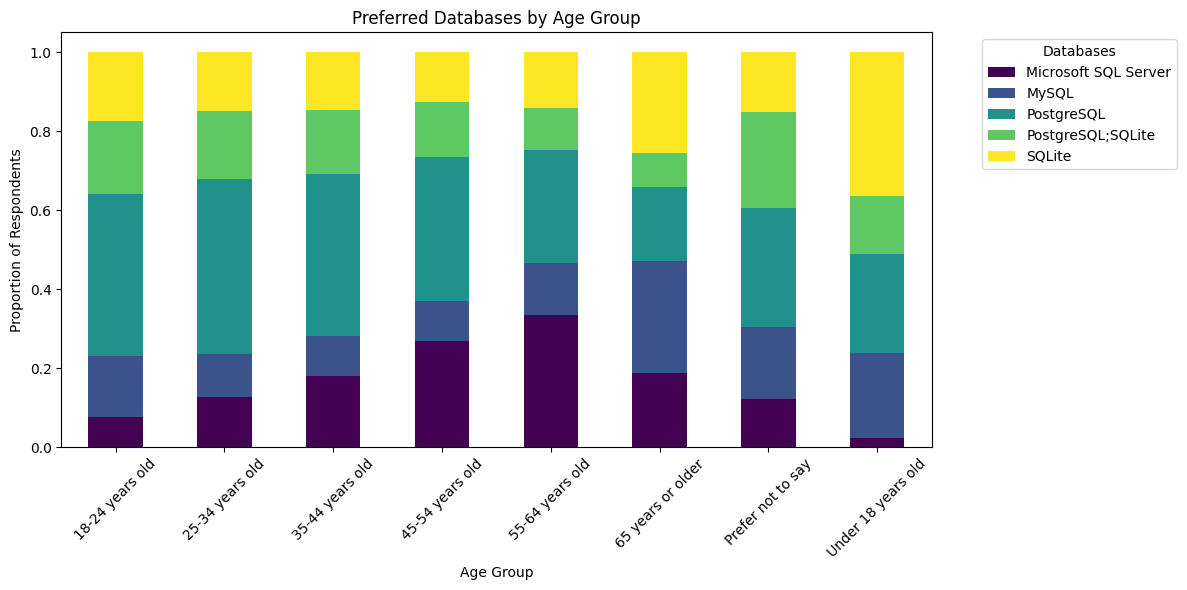

In [13]:
df = pd.read_csv("survey-data.csv")

df = df.dropna(subset=["Age", "DatabaseWantToWorkWith"])

df["DatabaseWantToWorkWith"] = df["DatabaseWantToWorkWith"].str.split(",")

df_exploded = df.explode("DatabaseWantToWorkWith")

top_databases = df_exploded["DatabaseWantToWorkWith"].value_counts().head(5).index

df_filtered = df_exploded[df_exploded["DatabaseWantToWorkWith"].isin(top_databases)]

db_age_counts = df_filtered.groupby(["Age", "DatabaseWantToWorkWith"]).size().unstack(fill_value=0)

db_age_props = db_age_counts.div(db_age_counts.sum(axis=1), axis=0)

ax = db_age_props.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")

plt.title("Preferred Databases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion of Respondents")
plt.xticks(rotation=45)

plt.legend(title="Databases", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()

plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


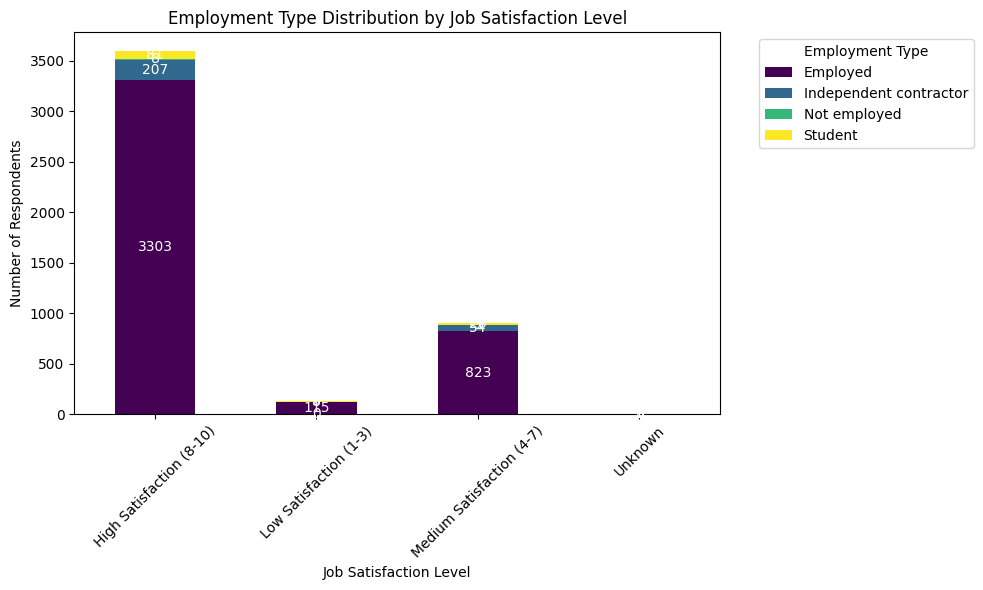

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

# Drop NaN values for relevant columns
df = df.dropna(subset=["Employment", "JobSatPoints_6"])

# Extract only the first part of the Employment type (before the comma)
df["Employment"] = df["Employment"].str.split(",").str[0].str.strip()

# Ensure JobSatPoints_6 is a numeric column and filter out invalid values
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")  # Convert to numeric, invalid values become NaN

# Filter out rows where JobSatPoints_6 is outside the valid range (1-10)
df = df[df["JobSatPoints_6"].between(1, 10, inclusive="both")]

# Define satisfaction categories
def categorize_satisfaction(x):
    if x in [1, 2, 3]:
        return "Low Satisfaction (1-3)"
    elif x in [4, 5, 6, 7]:
        return "Medium Satisfaction (4-7)"
    elif x in [8, 9, 10]:
        return "High Satisfaction (8-10)"
    return "Unknown"

# Apply the function to categorize JobSatPoints_6
df["SatisfactionGroup"] = df["JobSatPoints_6"].apply(categorize_satisfaction)

# Group by job satisfaction group and employment type, then count occurrences (raw counts)
emp_sat_counts = df.groupby(["SatisfactionGroup", "Employment"]).size().unstack(fill_value=0)

# Plot stacked bar chart with raw counts
ax = emp_sat_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

# Customize plot
plt.title("Employment Type Distribution by Job Satisfaction Level")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)

# Add data labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="center", fontsize=10, color="white")

# Move legend outside the plot
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_577/3941801494.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["LanguageAdmired"] = df_cleaned["LanguageAdmired"].apply(lambda x: list(set(str(x).split(";"))))


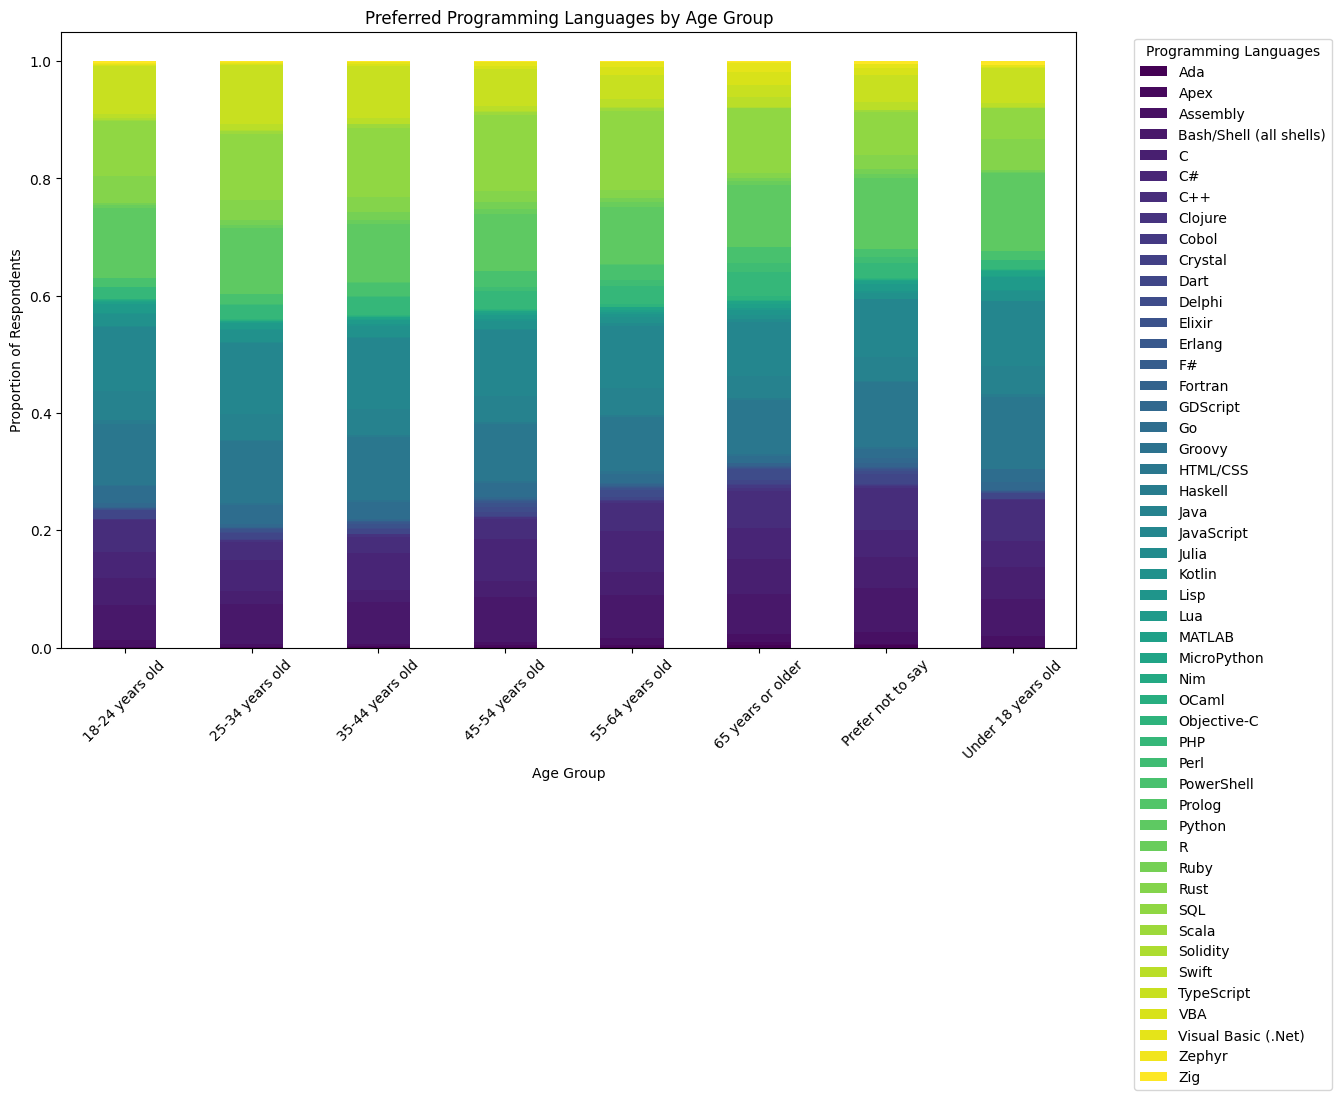

In [6]:
df_cleaned = df.dropna(subset=["Age", "LanguageAdmired"])

df_cleaned["LanguageAdmired"] = df_cleaned["LanguageAdmired"].apply(lambda x: list(set(str(x).split(";"))))

df_exploded = df_cleaned.explode("LanguageAdmired")

language_age_counts = df_exploded.groupby(["Age", "LanguageAdmired"]).size().unstack(fill_value=0)

language_age_props = language_age_counts.div(language_age_counts.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(14, 8))
language_age_props.plot(kind="bar", stacked=True, ax=ax, colormap="viridis")

plt.title("Preferred Programming Languages by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion of Respondents")
plt.xticks(rotation=45)

plt.legend(title="Programming Languages", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.subplots_adjust(right=0.85)

plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_410/1142503342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PlatformAdmiredList'] = df_clean['PlatformAdmired'].str.split(';')


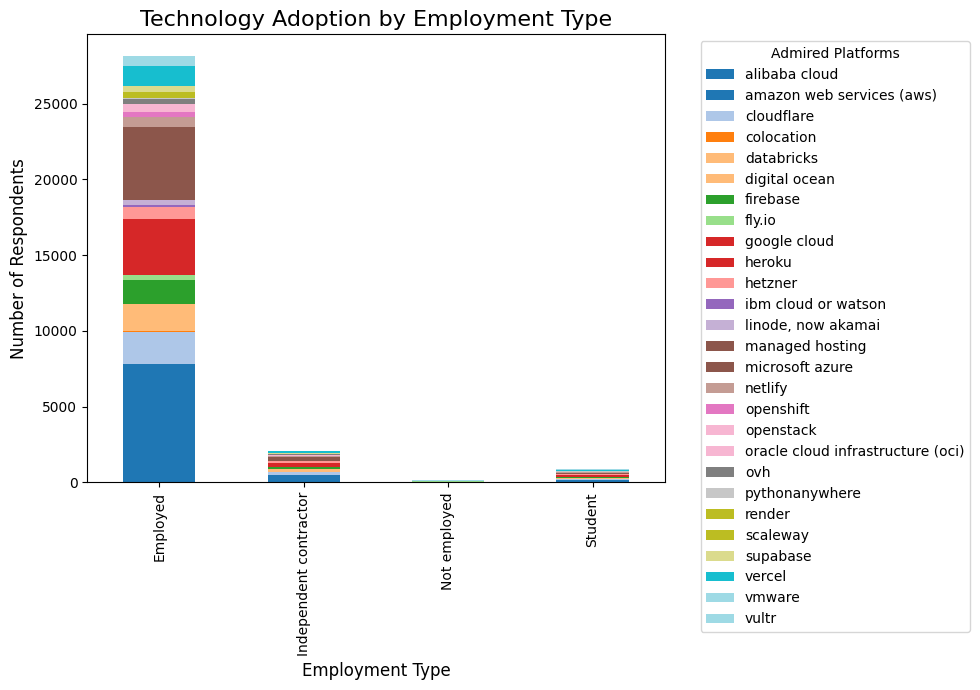

In [16]:
df_clean = df.dropna(subset=["PlatformAdmired"])

df_clean['PlatformAdmiredList'] = df_clean['PlatformAdmired'].str.split(';')

df_exploded = df_clean.explode('PlatformAdmiredList')

df_exploded['PlatformAdmiredList'] = df_exploded['PlatformAdmiredList'].str.strip().str.lower()

df_exploded['EmploymentType'] = df_exploded['Employment'].str.split(',').str[0].str.strip()

platform_counts = df_exploded.groupby(['EmploymentType', 'PlatformAdmiredList']).size().unstack(fill_value=0)

ax = platform_counts.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')

ax.set_title('Technology Adoption by Employment Type', fontsize=16)
ax.set_xlabel('Employment Type', fontsize=12)
ax.set_ylabel('Number of Respondents', fontsize=12)
ax.legend(title='Admired Platforms', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
